In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.losses import SparseCategoricalCrossentropy
from matplotlib import pyplot as plt

Učitati skup podataka $cifar10$ i za obučavanje koristiti prvih $10000$ slika iz skupa za obučavanje, a za testiranje koristiti prvih $1000$ slika iz skupa za testiranje.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:1000]
y_test = y_test[:1000]

Izvršiti normalizaciju piksela i eventualno promeniti kodiranje ciljne promenljive.

In [3]:
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
y_test.shape

(1000, 10)

Napraviti konvolutivnu neuronsku mrežu sa sledećom arhitekturom:
- Konvolutivni sloj sa $32$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Konvolutivni sloj sa $32$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Agregacioni sloj sa veličinom prozora $2 \times 2$
- Konvolutivni sloj sa $64$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Konvolutivni sloj sa $64$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Agregacioni sloj sa veličinom prozora $2 \times 2$
- Sloj za ravnanje (Flatten)
- Potpuno povezani sloj sa $64$ neurona i ReLu aktivacionom funkcijom
- Potpuno povezani sloj sa brojem neurona jednakim broju klasa i softmax aktivacionom funkcijom

In [5]:
input_shape = X_train.shape[1:]
no_of_categories = y_test.shape[1]
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=no_of_categories, activation='softmax'))

Obučiti model - postaviti veličinu paketa (batch size) na $64$, broj epoha na $10$.

Iskoristiti $20\%$ trening podataka za validaciju.

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 5s 6ms/step - loss: 1.9280 - accuracy: 0.2836 - val_loss: 1.6593 - val_accuracy: 0.3900
Epoch 2/10
125/125 [==============================] - 1s 4ms/step - loss: 1.5961 - accuracy: 0.4170 - val_loss: 1.4998 - val_accuracy: 0.4380
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 1.4410 - accuracy: 0.4804 - val_loss: 1.4382 - val_accuracy: 0.4735
Epoch 4/10
125/125 [==============================] - 1s 4ms/step - loss: 1.3179 - accuracy: 0.5251 - val_loss: 1.3033 - val_accuracy: 0.5280
Epoch 5/10
125/125 [==============================] - 1s 4ms/step - loss: 1.2151 - accuracy: 0.5641 - val_loss: 1.3213 - val_accuracy: 0.5310
Epoch 6/10
125/125 [==============================] - 1s 4ms/step - loss: 1.1013 - accuracy: 0.6054 - val_loss: 1.2268 - val_accuracy: 0.5600
Epoch 7/10
125/125 [==============================] - 1s 4ms/step - loss: 1.0305 - accuracy: 0.6288 - val_loss: 1.2793 - val_accuracy: 0.5370
Epoch 

Nacrtati grafik promene funkcije greške kroz epohe na skupu za obučavanje i za validaciju.

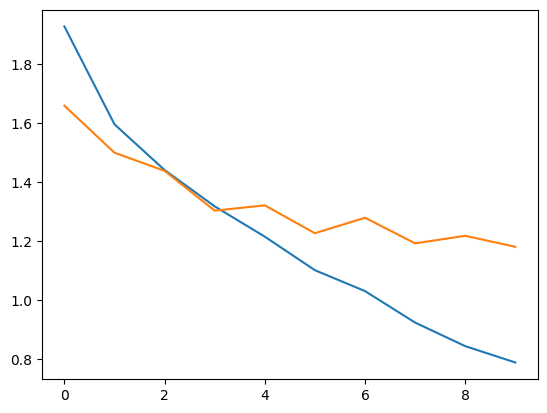

In [7]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

Nacrtati grafik promene tačnosti kroz epohe na skupu za obučavanje i za validaciju.

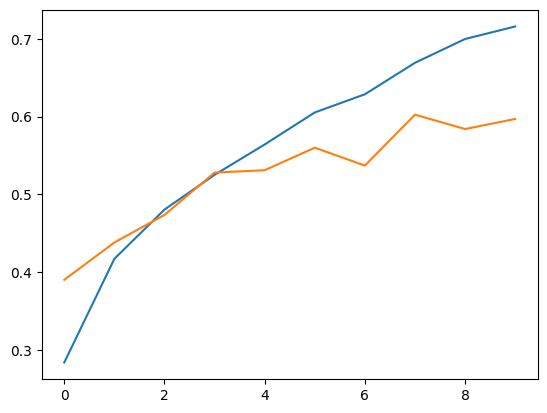

In [8]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

Izvršiti evaluaciju modela na skupu za testiranje.

In [9]:
model.evaluate(X_test, y_test, batch_size=64)

16/16 [==============================] - 0s 5ms/step - loss: 1.2027 - accuracy: 0.5990


[1.2027060985565186, 0.5989999771118164]

Napraviti novi model koji ima istu arhitekturu kao prethodni, ali dodatno koristi regularizaciju izostavljanjem - ima $Dropout$ sloj sa faktorom $0.2$ posle svakog agregacionog sloja i između dva potpuno povezana sloja.

In [10]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(rate=0.2))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(rate=0.2))
model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=no_of_categories, activation='softmax'))

Obučiti novi model sa istim parametrima kao kod starog modela.

In [11]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 1s 5ms/step - loss: 2.0537 - accuracy: 0.2338 - val_loss: 1.7963 - val_accuracy: 0.3370
Epoch 2/10
125/125 [==============================] - 1s 4ms/step - loss: 1.6996 - accuracy: 0.3717 - val_loss: 1.5847 - val_accuracy: 0.4335
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 1.5720 - accuracy: 0.4199 - val_loss: 1.4799 - val_accuracy: 0.4395
Epoch 4/10
125/125 [==============================] - 1s 4ms/step - loss: 1.4978 - accuracy: 0.4539 - val_loss: 1.4243 - val_accuracy: 0.4920
Epoch 5/10
125/125 [==============================] - 1s 4ms/step - loss: 1.4025 - accuracy: 0.4926 - val_loss: 1.3352 - val_accuracy: 0.5065
Epoch 6/10
125/125 [==============================] - 1s 4ms/step - loss: 1.3326 - accuracy: 0.5203 - val_loss: 1.3576 - val_accuracy: 0.5245
Epoch 7/10
125/125 [==============================] - 1s 4ms/step - loss: 1.2877 - accuracy: 0.5371 - val_loss: 1.2805 - val_accuracy: 0.5380
Epoch 

Nacrtati oba grafika i za novi model.

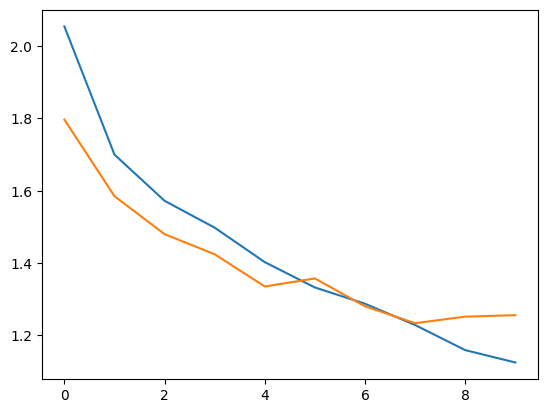

In [12]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

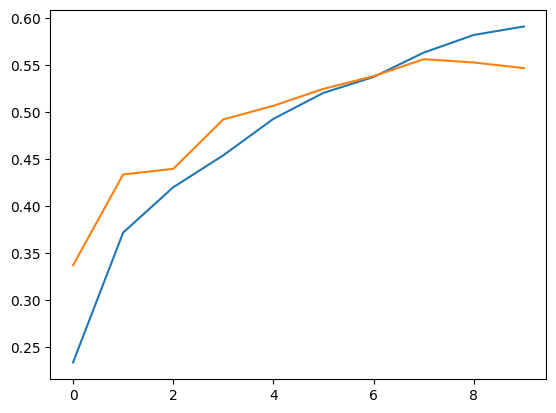

In [13]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

Da li poređenjem ova dva grafika sa prethodna dva možete da zaključite koji model se bolje ponaša i zašto?

Prvi model se ponasa bolje - nema preprilagodjenosti pa dropout ne pomaze

In [14]:
model2.evaluate(X_test, y_test, batch_size=64)

16/16 [==============================] - 0s 2ms/step - loss: 1.2355 - accuracy: 0.5510


[1.2354835271835327, 0.5509999990463257]